
# Загружаем данные

In [297]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [299]:
id_test = test_df.Id

train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
167,168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,325624
415,416,20,RL,73.0,8899,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,181134
479,480,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,89471
724,725,20,RL,86.0,13286,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,320000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000


# Exploratory data analysis, (EDA) 

In [300]:
A1 = set(train_df.Id.values)
A2 = set(test_df.Id.values)
print(len(A1 - A2), len(A1 & A2), len(A2 - A1))

1460 0 1459


показывается что нету одинаковых обьектов в данных. Нету пересечений

In [301]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [302]:
numeric_data = train_df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
y = train_df['SalePrice']
train_df.fillna(numeric_data_mean, inplace=True)
correlations = train_df[numeric_data.columns].corrwith(y).sort_values(ascending=False)
print('Корреляция числовых данных по отношению к y(SalePrice)')
correlations

Корреляция числовых данных по отношению к y(SalePrice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

**Визуализация на линейную зависимость числовых данных по отношению к y.**

Text(0, 0.5, 'FEATURES')

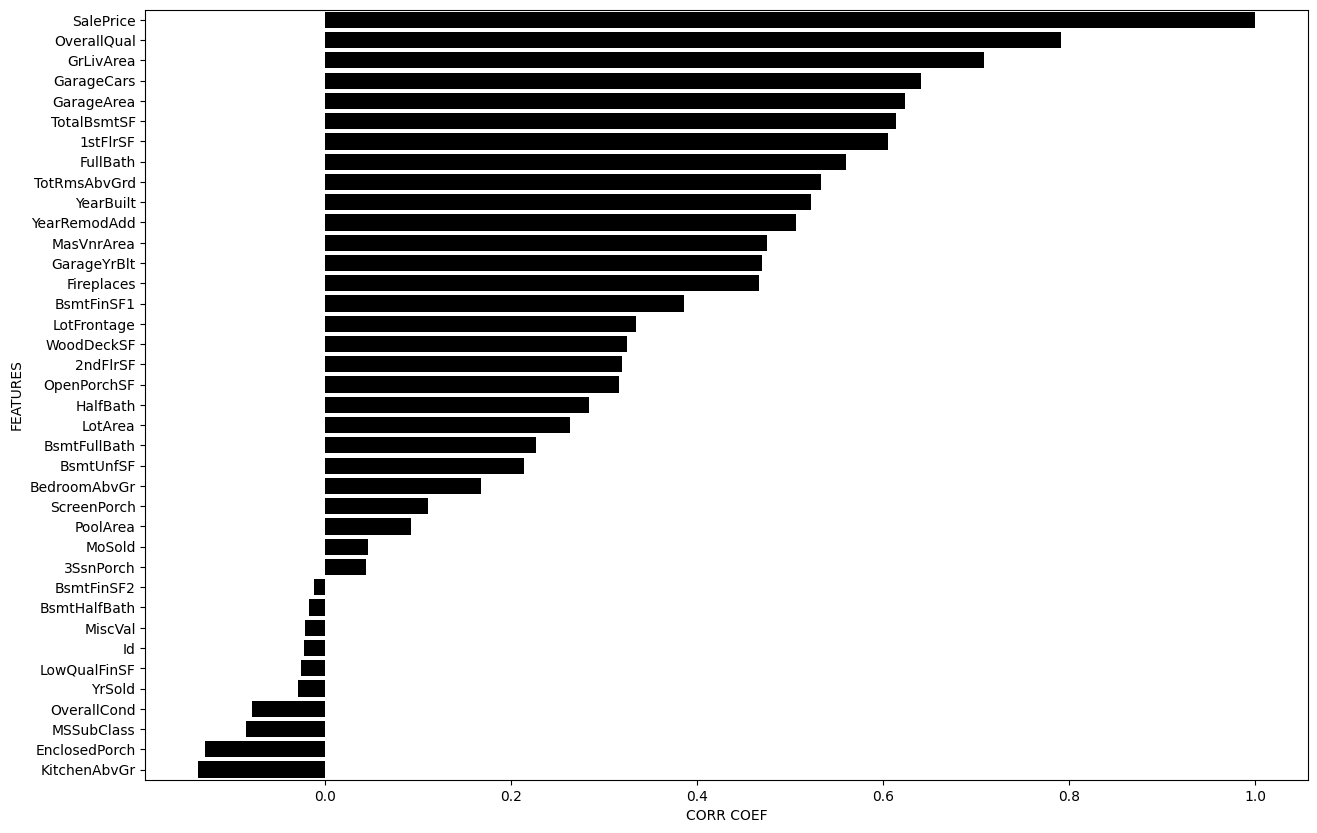

In [303]:
plot = sns.barplot(y=correlations.index, x=correlations, color='black')
plot.figure.set_size_inches(15, 10)
plt.xlabel('CORR COEF')
plt.ylabel('FEATURES')

In [304]:
index_to_drop = correlations.loc[correlations.abs() < 0.2]
index_to_drop.drop(["PoolArea", 'BsmtHalfBath', 'YrSold', 'BedroomAbvGr'], inplace=True)
print("Колонны у которых малая корреляция.")
index_to_drop

Колонны у которых малая корреляция.


ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [305]:
train_df.drop(columns=index_to_drop.index, inplace=True)
test_df.drop(columns=index_to_drop.index, inplace=True)
display(train_df.shape, test_df.shape)

(1460, 70)

(1459, 69)

Удаляю столбов которые имеют очень малую кореляцию (0.2) и также которые не нужны. 

**Начинаю находить outliers и удалять их**

In [306]:
train_df.select_dtypes([np.number]).shape

(1460, 27)

In [307]:
train_df.select_dtypes([np.number])

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,YrSold,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,2008,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,2007,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,2008,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,0,2006,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,7,1,1999.0,2,460,0,40,0,2007,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,7,2,1978.0,2,500,349,0,0,2010,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,9,2,1941.0,1,252,0,60,0,2010,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,5,0,1950.0,1,240,366,0,0,2010,142125


In [308]:
train_df.dtypes[train_df.dtypes != 'object']

LotFrontage     float64
LotArea           int64
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
PoolArea          int64
YrSold            int64
SalePrice         int64
dtype: object

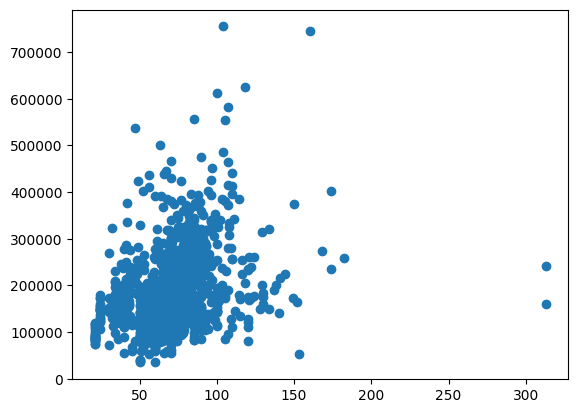

In [309]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

31.5 107.5


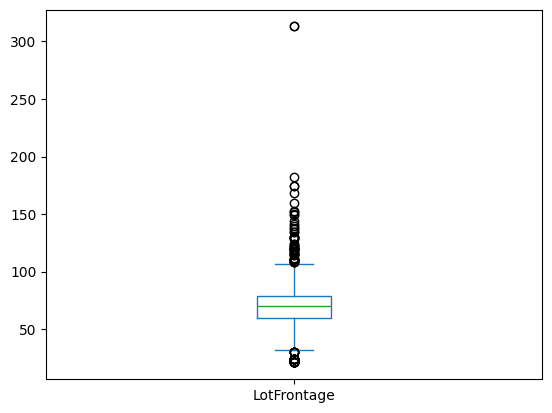

In [310]:
Q1 = train_df['LotFrontage'].quantile(0.25)
Q3 = train_df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['LotFrontage'].plot(kind='box')
plt.show()

In [311]:
outliers = train_df[(train_df['LotFrontage'] < lower_) | (train_df['LotFrontage'] > upper_)]
train_df.drop(outliers.index, inplace=True)
train_df[train_df['LotFrontage'] < lower_]

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice


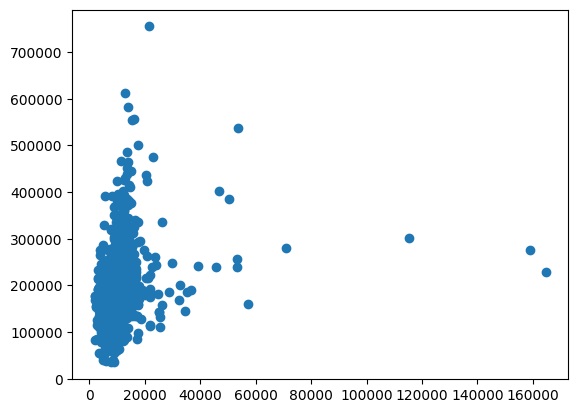

In [312]:
plt.scatter(x='LotArea', y="SalePrice", data=train_df)


2255.5 16891.5


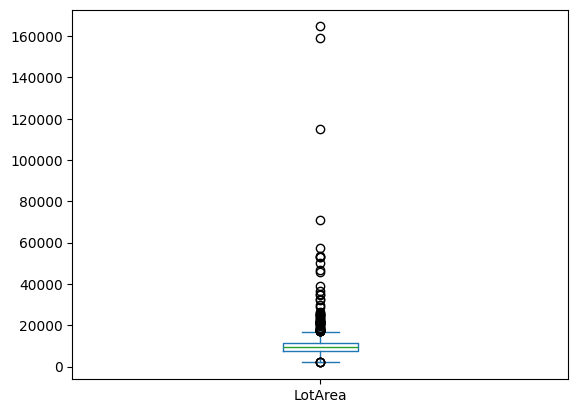

In [313]:
Q1 = train_df['LotArea'].quantile(0.25)
Q3 = train_df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['LotArea'].plot(kind='box')
plt.show()

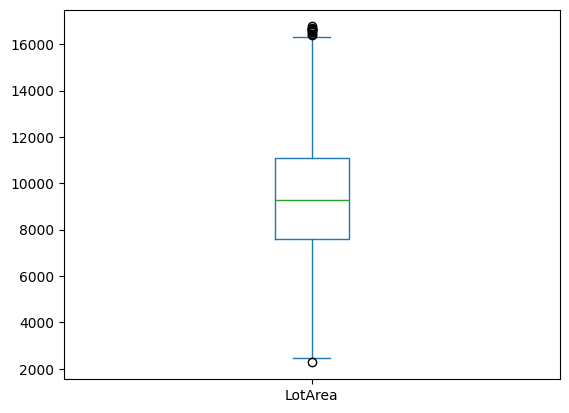

In [314]:
outliers = train_df[(train_df['LotArea'] <= lower_) | (train_df['LotArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['LotArea'].plot(kind='box')
plt.show()

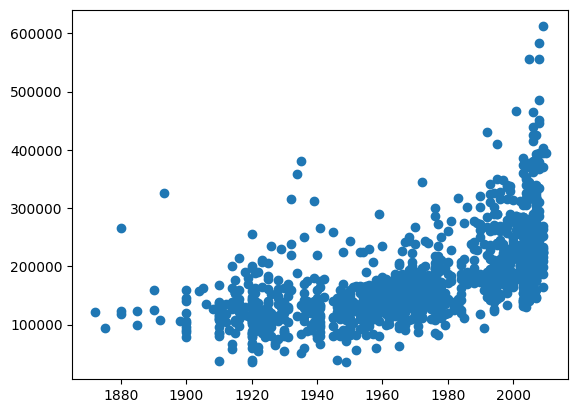

In [315]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)


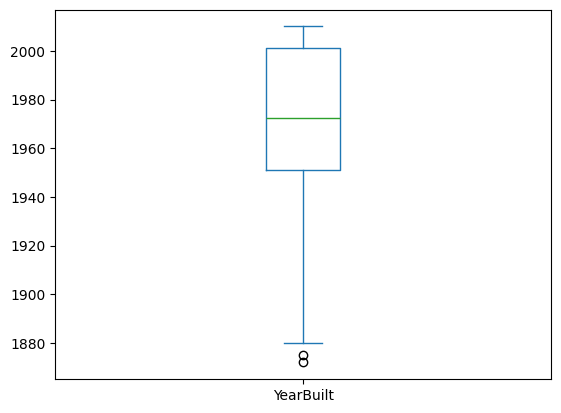

1876.0


In [316]:
Q1 = train_df['YearBuilt'].quantile(0.25)
Q3 = train_df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
train_df['YearBuilt'].plot(kind='box')
plt.show()
print(lower_)

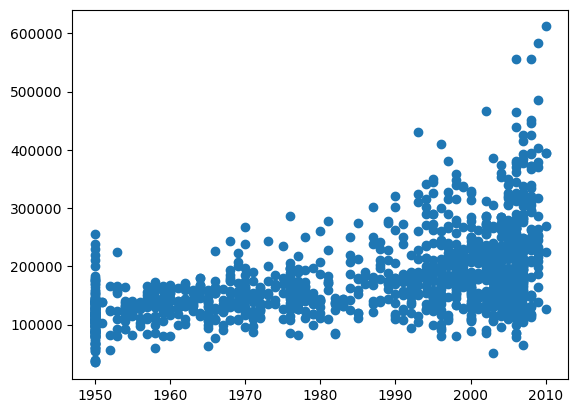

In [317]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)
plt.show()

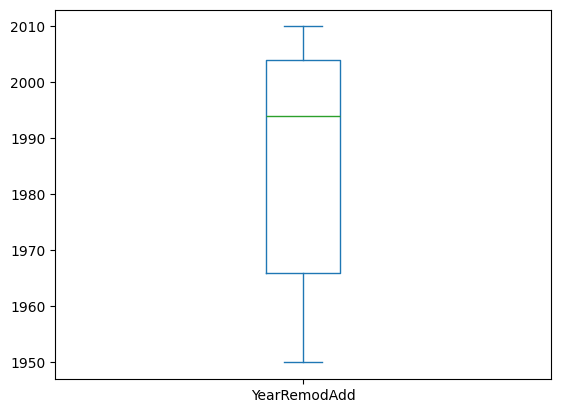

1909.0


In [318]:
Q1 = train_df['YearRemodAdd'].quantile(0.25)
Q3 = train_df['YearRemodAdd'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
train_df['YearRemodAdd'].plot(kind='box')
plt.show()
print(lower_)

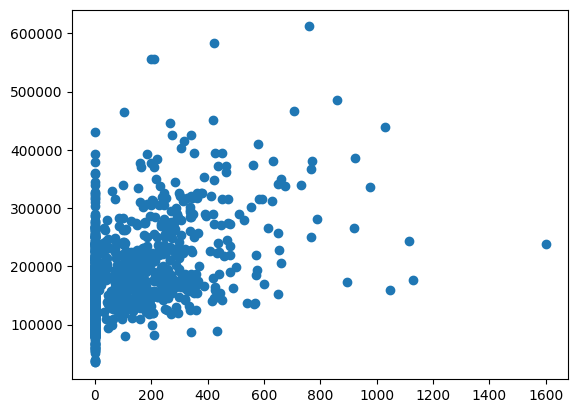

In [319]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)
plt.show()

-235.875 707.625


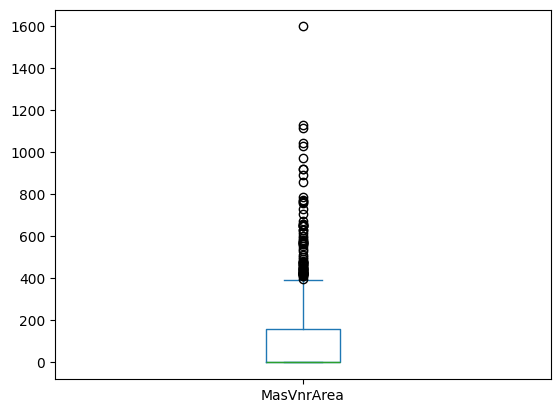

In [320]:
Q1 = train_df['MasVnrArea'].quantile(0.25)
Q3 = train_df['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 3.5 * IQR
print(lower_, upper_)
train_df['MasVnrArea'].plot(kind='box')
plt.show()

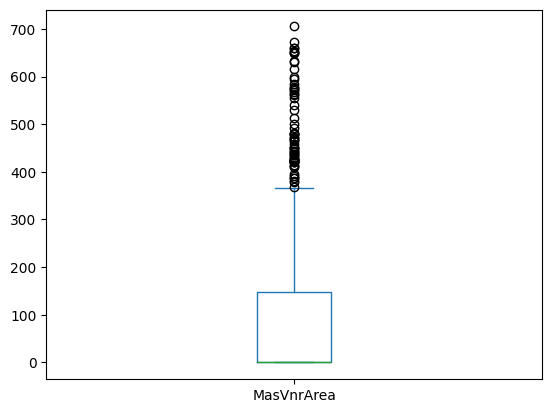

In [321]:
outliers = train_df[(train_df['MasVnrArea'] <= lower_) | (train_df['MasVnrArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['MasVnrArea'].plot(kind='box')
plt.show()

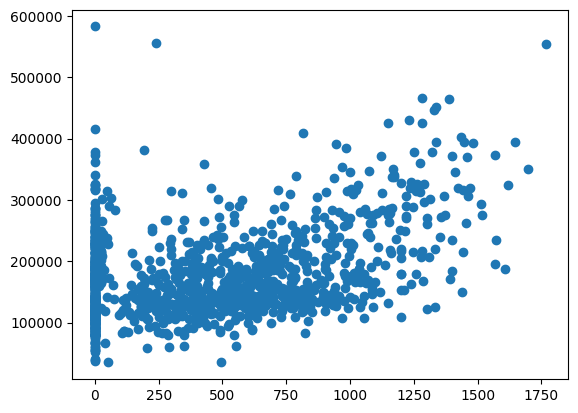

In [322]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)


-1050.75 1751.25


<Axes: >

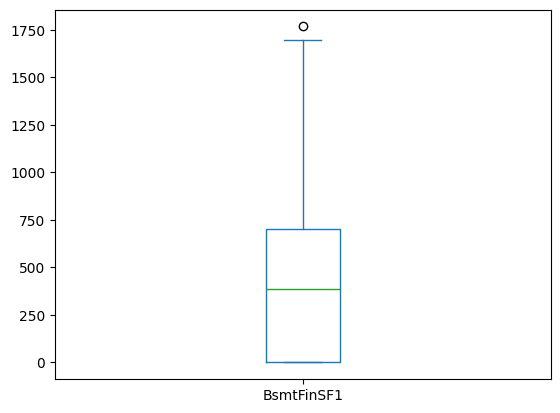

In [323]:
Q1 = train_df['BsmtFinSF1'].quantile(0.25)
Q3 = train_df['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['BsmtFinSF1'].plot(kind='box')

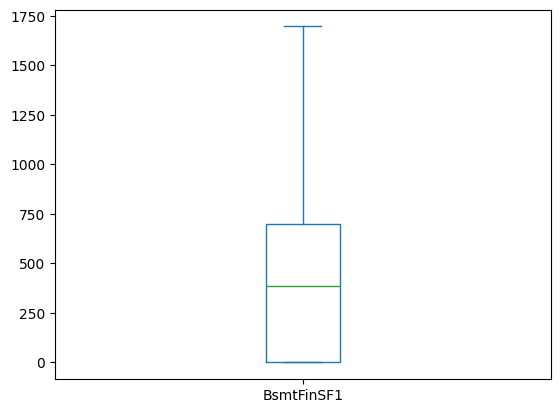

In [324]:
outliers = train_df[(train_df['BsmtFinSF1'] <= lower_) | (train_df['BsmtFinSF1'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['BsmtFinSF1'].plot(kind='box')
plt.show()

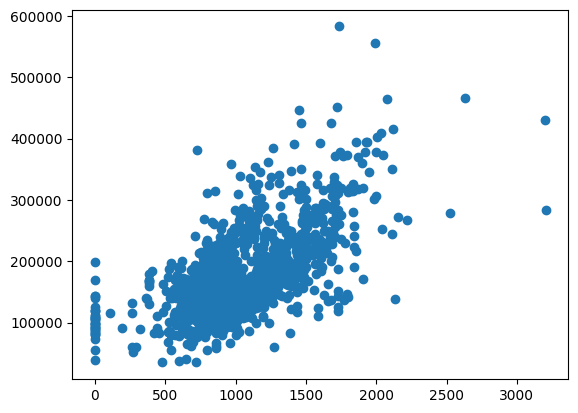

In [325]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)


In [326]:
train_df.drop(train_df.query('TotalBsmtSF > 2000').index, inplace=True)
train_df.query('TotalBsmtSF > 2000')

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice


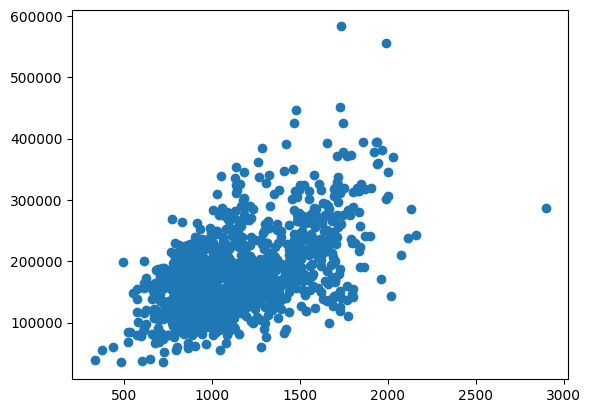

In [327]:
plt.scatter(x='1stFlrSF', y="SalePrice", data=train_df)

208.25 2018.25


<Axes: >

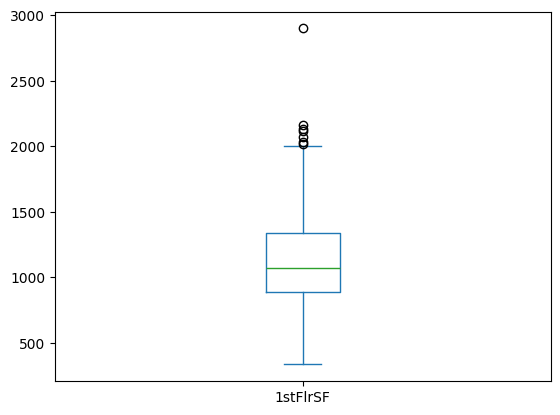

In [328]:
Q1 = train_df['1stFlrSF'].quantile(0.25)
Q3 = train_df['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['1stFlrSF'].plot(kind='box')

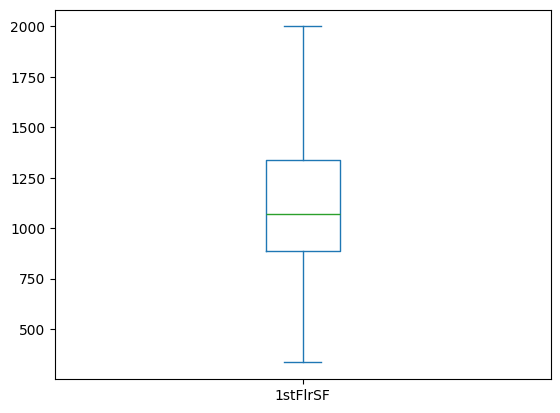

In [329]:
outliers = train_df[(train_df['1stFlrSF'] <= lower_) | (train_df['1stFlrSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['1stFlrSF'].plot(kind='box')
plt.show()

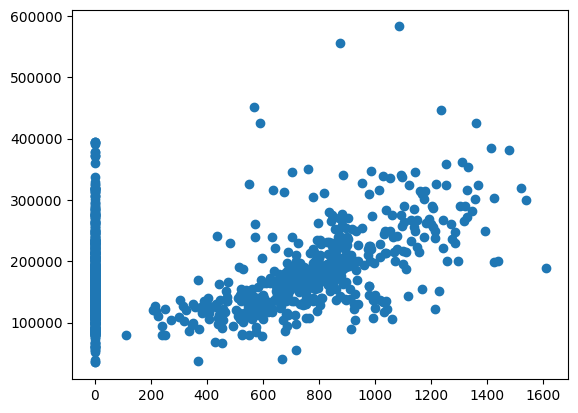

In [330]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

-1081.875 1803.125


<Axes: >

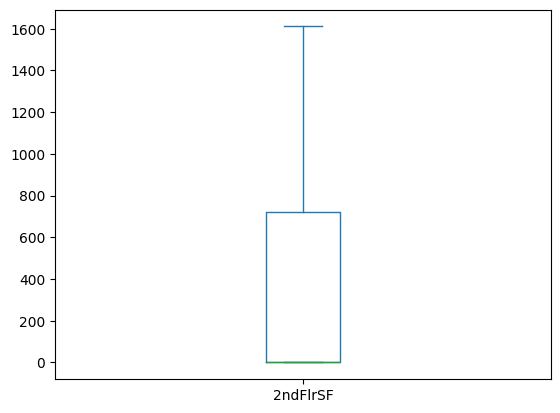

In [331]:
Q1 = train_df['2ndFlrSF'].quantile(0.25)
Q3 = train_df['2ndFlrSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['2ndFlrSF'].plot(kind='box')

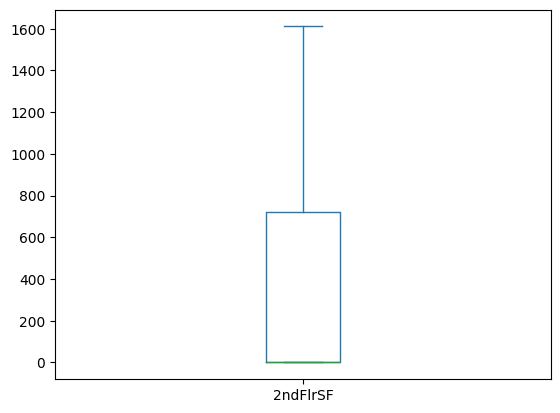

In [332]:
outliers = train_df[(train_df['2ndFlrSF'] <= lower_) | (train_df['2ndFlrSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['2ndFlrSF'].plot(kind='box')
plt.show()

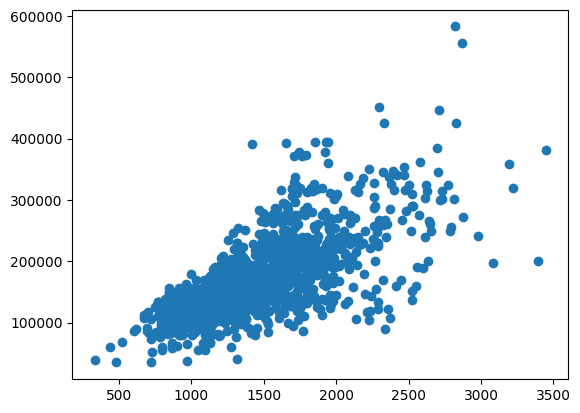

In [333]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)


193.0 2649.0


<Axes: >

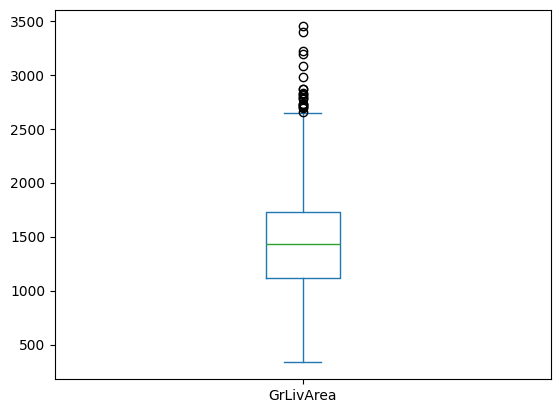

In [334]:
Q1 = train_df['GrLivArea'].quantile(0.25)
Q3 = train_df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GrLivArea'].plot(kind='box')

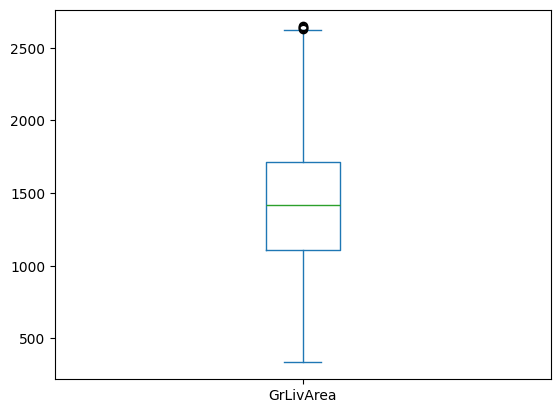

In [335]:
outliers = train_df[(train_df['GrLivArea'] <= lower_) | (train_df['GrLivArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GrLivArea'].plot(kind='box')
plt.show()

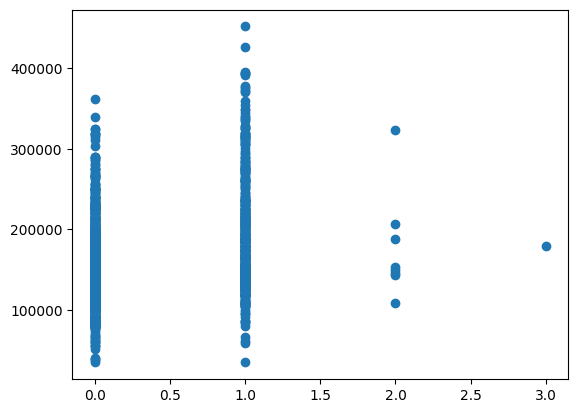

In [336]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

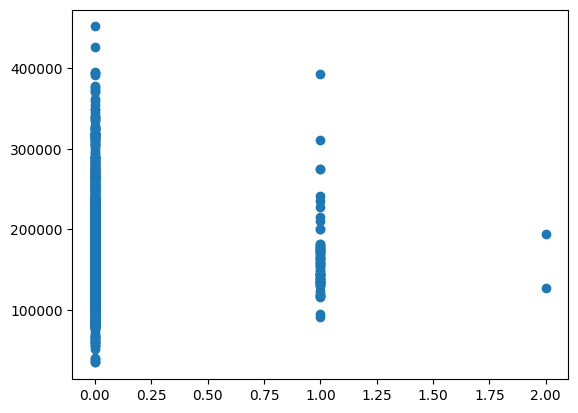

In [337]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)


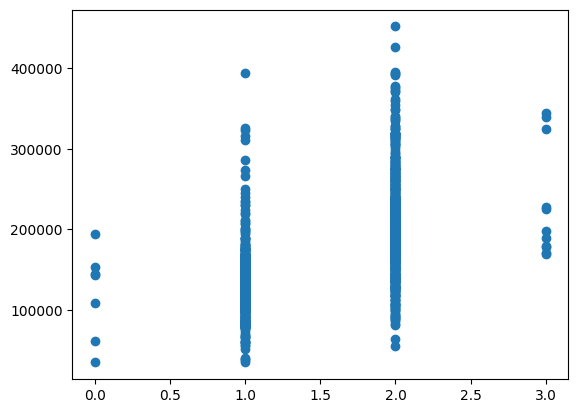

In [338]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)


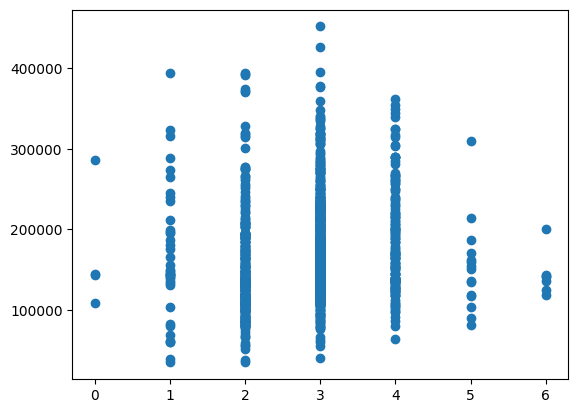

In [339]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

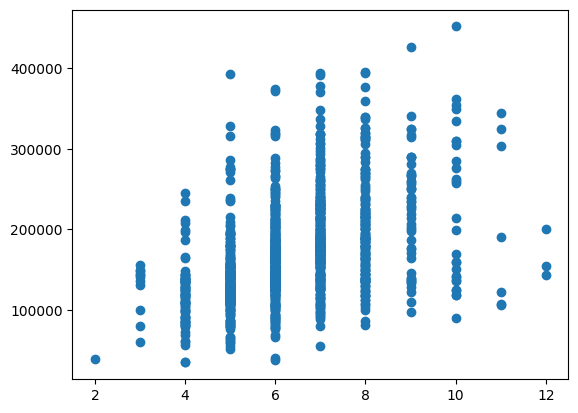

In [340]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

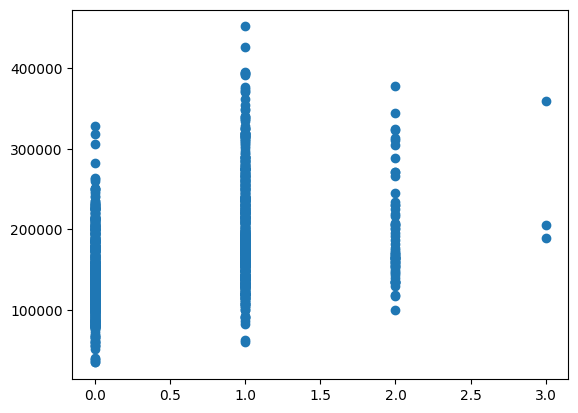

In [341]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

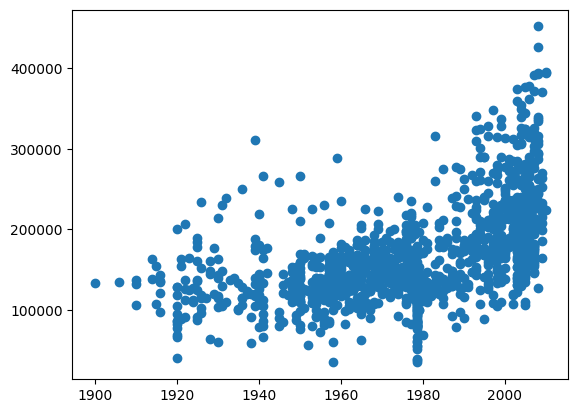

In [342]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data =train_df)

1901.0 2061.0


<Axes: >

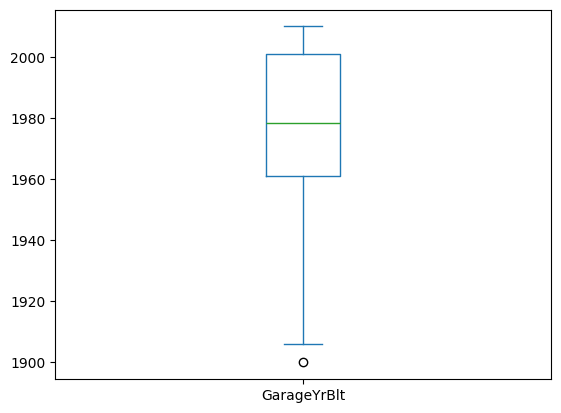

In [343]:
Q1 = train_df['GarageYrBlt'].quantile(0.25)
Q3 = train_df['GarageYrBlt'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageYrBlt'].plot(kind='box')

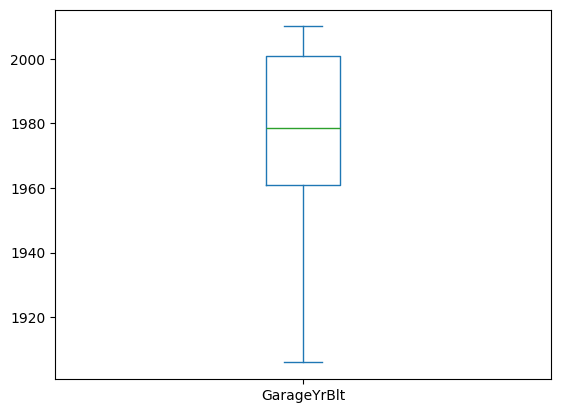

In [344]:
outliers = train_df[(train_df['GarageYrBlt'] <= lower_) | (train_df['GarageYrBlt'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageYrBlt'].plot(kind='box')
plt.show()

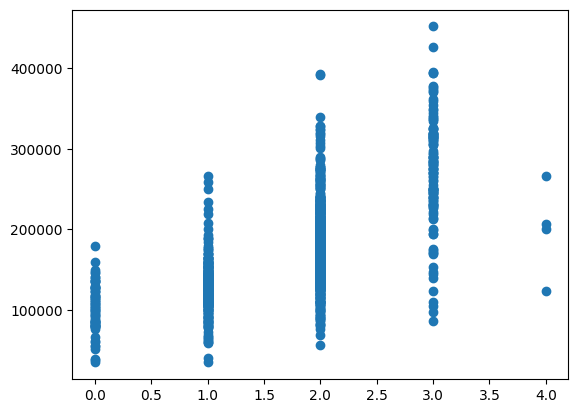

In [345]:
plt.scatter(x='GarageCars', y='SalePrice', data =train_df)

-0.5 3.5


<Axes: >

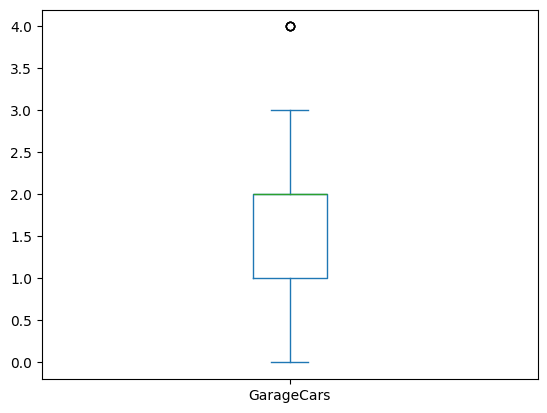

In [346]:
Q1 = train_df['GarageCars'].quantile(0.25)
Q3 = train_df['GarageCars'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageCars'].plot(kind='box')

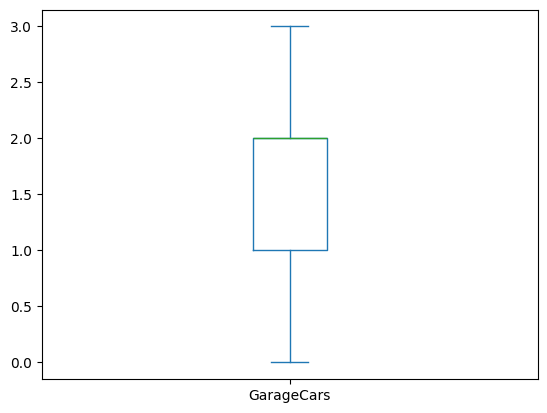

In [347]:
outliers = train_df[(train_df['GarageCars'] <= lower_) | (train_df['GarageCars'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageCars'].plot(kind='box')
plt.show()

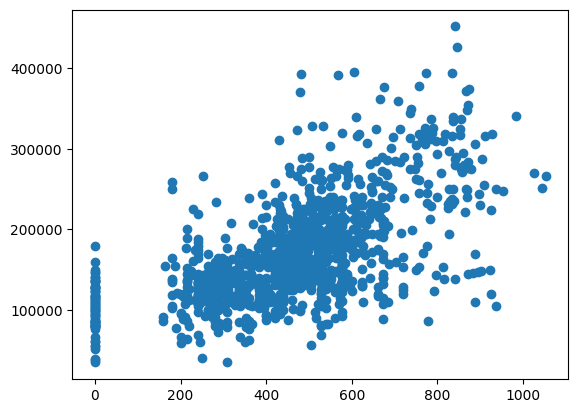

In [348]:
plt.scatter(x='GarageArea', y='SalePrice', data =train_df)

-88.0 968.0


<Axes: >

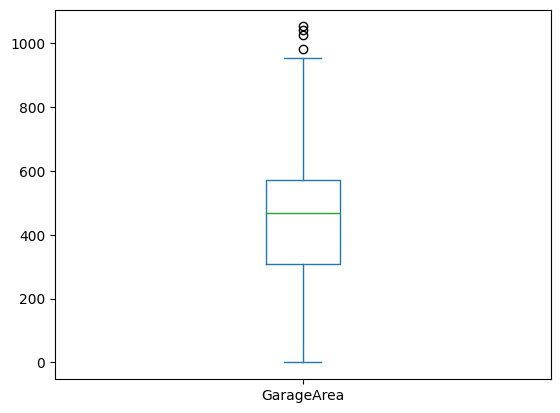

In [349]:
Q1 = train_df['GarageArea'].quantile(0.25)
Q3 = train_df['GarageArea'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageArea'].plot(kind='box')

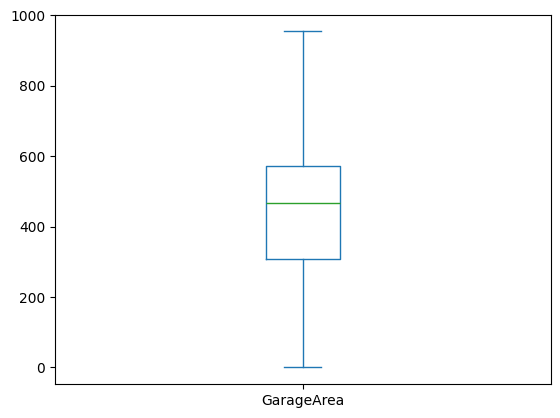

In [350]:
outliers = train_df[(train_df['GarageArea'] <= lower_) | (train_df['GarageArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageArea'].plot(kind='box')
plt.show()

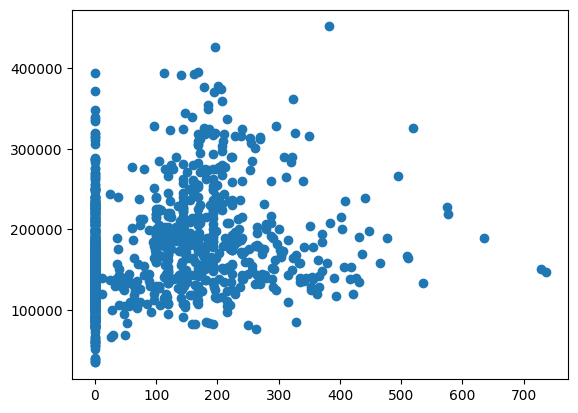

In [351]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data =train_df)

-246.0 410.0


<Axes: >

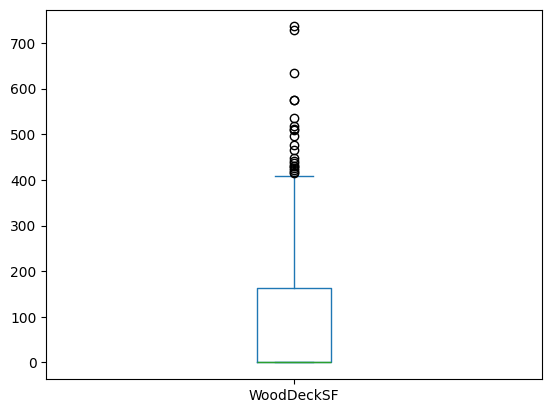

In [352]:
Q1 = train_df['WoodDeckSF'].quantile(0.25)
Q3 = train_df['WoodDeckSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['WoodDeckSF'].plot(kind='box')

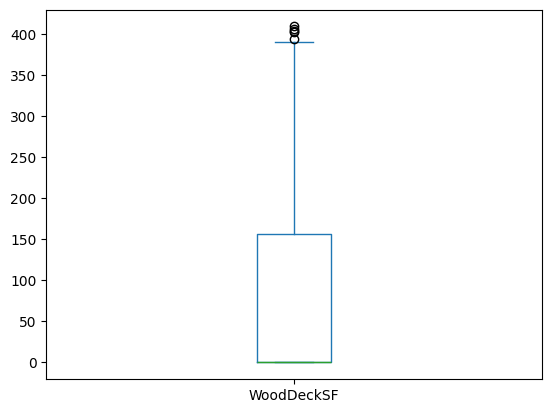

In [353]:
outliers = train_df[(train_df['WoodDeckSF'] <= lower_) | (train_df['WoodDeckSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['WoodDeckSF'].plot(kind='box')
plt.show()

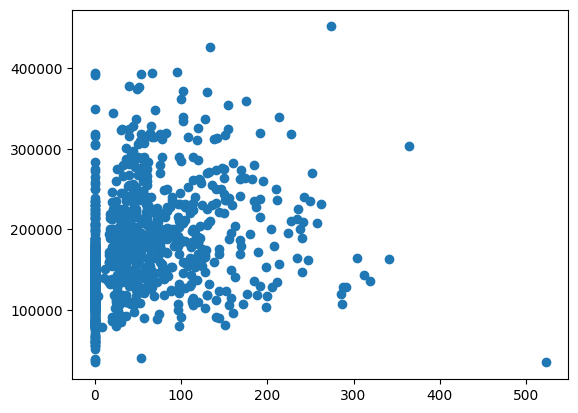

In [354]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data =train_df)


-96.0 160.0


<Axes: >

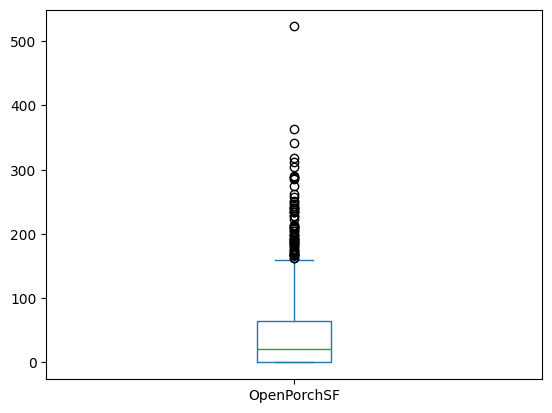

In [355]:
Q1 = train_df['OpenPorchSF'].quantile(0.25)
Q3 = train_df['OpenPorchSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['OpenPorchSF'].plot(kind='box')

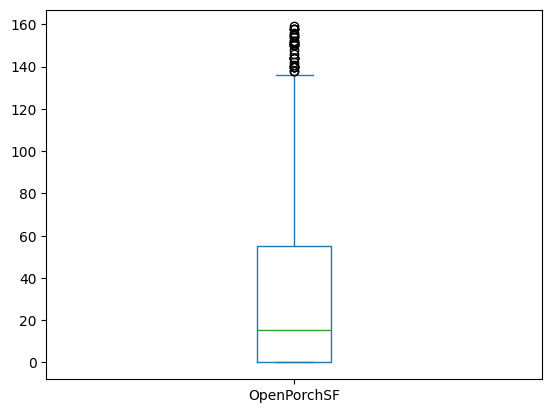

In [356]:
outliers = train_df[(train_df['OpenPorchSF'] <= lower_) | (train_df['OpenPorchSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['OpenPorchSF'].plot(kind='box')
plt.show()

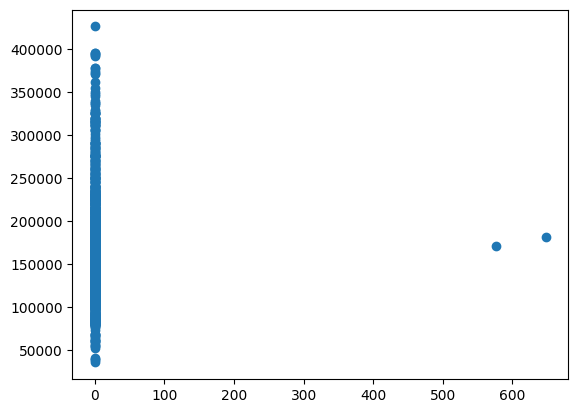

In [357]:
plt.scatter(x='PoolArea', y='SalePrice', data =train_df)


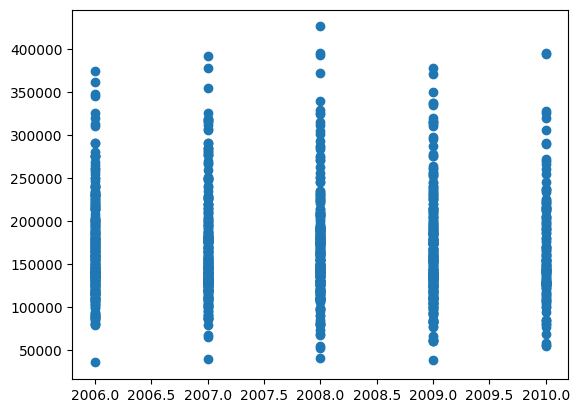

In [358]:
plt.scatter(x='YrSold', y='SalePrice', data =train_df)

**Еще раз чекаю корелляцию данных, после удаления выбросов**

In [359]:
numeric_data = train_df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
y = train_df['SalePrice']
train_df.fillna(numeric_data_mean, inplace=True)
correlations = train_df[numeric_data.columns].corrwith(y).sort_values(ascending=False)
correlations

SalePrice       1.000000
OverallQual     0.813368
GrLivArea       0.671515
GarageCars      0.650614
YearBuilt       0.640982
GarageArea      0.617753
TotalBsmtSF     0.592508
YearRemodAdd    0.568378
FullBath        0.553055
GarageYrBlt     0.551075
1stFlrSF        0.545959
MasVnrArea      0.469221
TotRmsAbvGrd    0.447255
OpenPorchSF     0.423319
Fireplaces      0.420541
BsmtFinSF1      0.384763
LotArea         0.327931
LotFrontage     0.309265
WoodDeckSF      0.307879
HalfBath        0.303291
2ndFlrSF        0.277978
BsmtFullBath    0.236692
BsmtUnfSF       0.168626
BedroomAbvGr    0.131492
PoolArea        0.005708
BsmtHalfBath   -0.011686
YrSold         -0.017763
dtype: float64

Колонны у которых корелляция меньше чем 0.2


BsmtUnfSF       0.168626
BedroomAbvGr    0.131492
PoolArea        0.005708
BsmtHalfBath   -0.011686
YrSold         -0.017763
dtype: float64

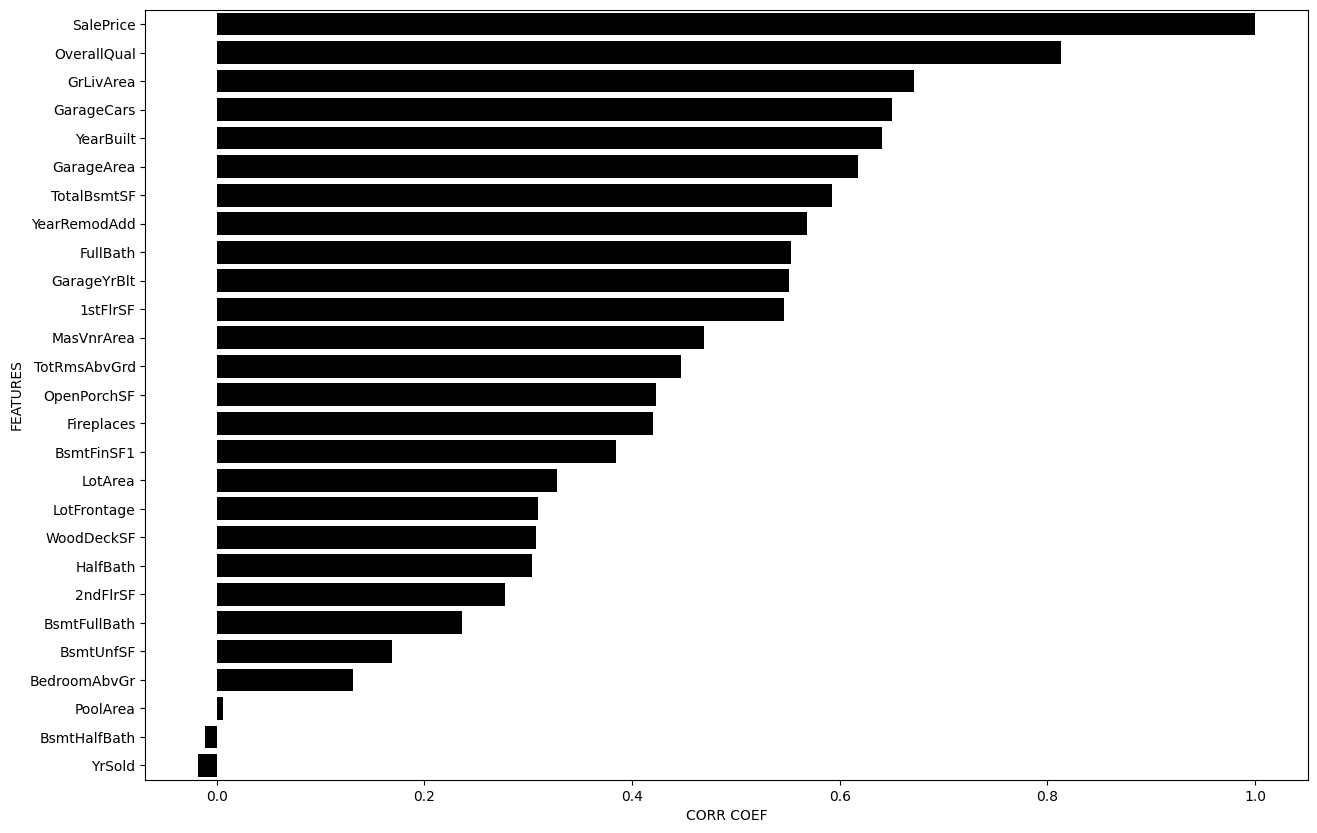

In [360]:
plot = sns.barplot(y=correlations.index, x=correlations, color='black')
plot.figure.set_size_inches(15, 10)
plt.xlabel('CORR COEF')
plt.ylabel('FEATURES')
index_to_drop = correlations.loc[correlations.abs() < 0.2]
print('Колонны у которых корелляция меньше чем 0.2')
index_to_drop

In [361]:
train_df.drop(columns=index_to_drop.index, inplace=True)
test_df.drop(columns=index_to_drop.index, inplace=True)
display(train_df.shape, test_df.shape)

(1132, 65)

(1459, 64)

## Меняю категориальные данные на числовые используя OrdinalEncoder

In [362]:
from sklearn.preprocessing import OrdinalEncoder

categorical = train_df.select_dtypes(include=['object'])
encoder = OrdinalEncoder()
train_df[categorical.columns] = encoder.fit_transform(train_df[categorical.columns])
train_df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3.0,65.0,8450,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,61,NaN,NaN,NaN,8.0,4.0,208500
1,3.0,80.0,9600,1.0,NaN,3.0,3.0,0.0,2.0,0.0,...,4.0,2.0,298,0,NaN,NaN,NaN,8.0,4.0,181500
2,3.0,68.0,11250,1.0,NaN,0.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,42,NaN,NaN,NaN,8.0,4.0,223500
3,3.0,60.0,9550,1.0,NaN,0.0,3.0,0.0,0.0,0.0,...,4.0,2.0,0,35,NaN,NaN,NaN,8.0,0.0,140000
4,3.0,84.0,14260,1.0,NaN,0.0,3.0,0.0,2.0,0.0,...,4.0,2.0,192,84,NaN,NaN,NaN,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.0,35.0,3675,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,28,NaN,NaN,NaN,8.0,4.0,145000
1454,1.0,62.0,7500,1.0,1.0,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,113,NaN,NaN,NaN,8.0,4.0,185000
1455,3.0,62.0,7917,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,40,NaN,NaN,NaN,8.0,4.0,175000
1457,3.0,66.0,9042,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,60,NaN,0.0,2.0,8.0,4.0,266500


In [363]:
categorical_t = test_df.select_dtypes(include=['object'])
encoder = OrdinalEncoder()
test_df[categorical_t.columns] = encoder.fit_transform(test_df[categorical.columns])
test_df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2.0,80.0,11622,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,3.0,4.0,2.0,140,0,NaN,2.0,NaN,8.0,4.0
1,3.0,81.0,14267,1.0,NaN,0.0,3.0,0.0,0.0,0.0,...,3.0,4.0,2.0,393,36,NaN,NaN,0.0,8.0,4.0
2,3.0,74.0,13830,1.0,NaN,0.0,3.0,0.0,4.0,0.0,...,3.0,4.0,2.0,212,34,NaN,2.0,NaN,8.0,4.0
3,3.0,78.0,9978,1.0,NaN,0.0,3.0,0.0,4.0,0.0,...,3.0,4.0,2.0,360,36,NaN,NaN,NaN,8.0,4.0
4,3.0,43.0,5005,1.0,NaN,0.0,1.0,0.0,4.0,0.0,...,3.0,4.0,2.0,0,82,NaN,NaN,NaN,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,21.0,1936,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,NaN,NaN,2.0,0,0,NaN,NaN,NaN,8.0,4.0
1455,4.0,21.0,1894,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,3.0,4.0,2.0,0,24,NaN,NaN,NaN,8.0,0.0
1456,3.0,160.0,20000,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,3.0,4.0,2.0,474,0,NaN,NaN,NaN,8.0,0.0
1457,3.0,62.0,10441,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,NaN,NaN,2.0,80,32,NaN,2.0,2.0,8.0,4.0


In [364]:
train_df.isna().sum()

MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1067
                 ... 
Fence             897
MiscFeature      1089
SaleType            0
SaleCondition       0
SalePrice           0
Length: 65, dtype: int64

In [365]:
test_df.isna().sum()

MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
                 ... 
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
Length: 64, dtype: int64

In [366]:
percent = 0
for i in train_df.columns:
    percent = (train_df[i].isna().sum()/train_df[i].shape[0])*100
    if percent > 0:
        train_df.drop(columns=i, inplace=True)
        percent = 30
    else:
        percent = 0
train_df.sample(15)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
817,3.0,70.049958,13265,1.0,0.0,3.0,0.0,1.0,0.0,9.0,...,2,2002.0,3,857,2.0,150,59,8.0,4.0,271000
1271,3.0,70.049958,9156,1.0,0.0,3.0,0.0,4.0,0.0,12.0,...,1,1968.0,2,462,2.0,0,0,8.0,4.0,185750
903,3.0,50.000000,14859,1.0,0.0,1.0,0.0,1.0,0.0,6.0,...,1,2006.0,3,690,2.0,144,60,6.0,5.0,240000
1075,3.0,75.000000,13125,1.0,3.0,3.0,0.0,4.0,0.0,4.0,...,2,1940.0,1,240,2.0,0,0,1.0,4.0,219500
593,4.0,70.049958,4435,1.0,3.0,3.0,0.0,4.0,0.0,3.0,...,0,2003.0,2,420,2.0,140,0,8.0,4.0,140000
1053,3.0,68.000000,8562,1.0,3.0,3.0,0.0,4.0,1.0,5.0,...,1,1957.0,1,364,2.0,116,78,8.0,4.0,144500
407,3.0,63.000000,15576,1.0,3.0,3.0,0.0,4.0,0.0,4.0,...,0,1960.0,1,308,2.0,0,0,8.0,4.0,177000
412,1.0,70.049958,4403,1.0,1.0,3.0,0.0,4.0,0.0,19.0,...,1,2009.0,2,484,2.0,0,144,6.0,5.0,222000
972,3.0,55.000000,7892,1.0,3.0,3.0,0.0,4.0,0.0,18.0,...,1,1979.0,1,264,2.0,28,0,8.0,4.0,99500
1281,3.0,50.000000,8049,1.0,0.0,3.0,0.0,1.0,0.0,21.0,...,1,1990.0,2,484,2.0,0,58,8.0,4.0,180000


In [367]:
percent = 0
for i in test_df.columns:
    percent = (test_df[i].isna().sum()/test_df[i].shape[0])*100
    if percent > 0:
        test_df.drop(columns=i, inplace=True)
        percent = 30
    else:
        percent = 0
test_df.sample(15)

,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
433,10926,1.0,3.0,3.0,4.0,0.0,7.0,2.0,2.0,2.0,...,0,1678,2,0,10,0,2.0,0,0,4.0
890,10440,1.0,3.0,3.0,0.0,0.0,21.0,2.0,2.0,0.0,...,0,1584,2,0,6,1,2.0,0,256,5.0
379,10800,1.0,3.0,3.0,4.0,0.0,7.0,2.0,2.0,2.0,...,0,1200,3,0,5,0,2.0,120,0,2.0
1063,8660,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,...,0,1025,2,0,6,1,2.0,127,0,4.0
381,9780,1.0,3.0,3.0,4.0,0.0,7.0,2.0,2.0,0.0,...,425,1112,2,0,6,0,0.0,0,0,4.0
405,10816,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,...,0,1720,2,0,8,1,2.0,208,104,4.0
1031,11075,1.0,3.0,3.0,0.0,0.0,4.0,2.0,2.0,0.0,...,0,1522,2,0,7,1,2.0,0,77,4.0
536,11000,1.0,3.0,3.0,2.0,0.0,15.0,2.0,2.0,0.0,...,639,2172,2,1,8,1,2.0,162,153,4.0
98,6449,1.0,0.0,3.0,4.0,0.0,18.0,2.0,2.0,0.0,...,942,1884,1,1,7,0,0.0,0,0,0.0
777,8940,1.0,0.0,3.0,0.0,0.0,11.0,2.0,2.0,2.0,...,0,1344,2,0,8,0,2.0,0,0,2.0


Удалил колонны которые имеют больше 30% пустые ячейки 

In [368]:
train_df = train_df.apply(lambda x: x.fillna(x.median()), axis=0)
train_df.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [369]:
test_df = test_df.apply(lambda x: x.fillna(x.median()), axis=0)
test_df.isna().sum()

LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleCondition    0
dtype: int64

In [370]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = train_df.loc[:, train_df.columns!='SalePrice']
y = train_df['SalePrice']
display(X, y)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,3.0,...,5.0,0,2003.0,2,548,2.0,0,61,8.0,4.0
1,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,22.0,...,5.0,1,1976.0,2,460,2.0,298,0,8.0,4.0
2,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,3.0,...,5.0,1,2001.0,2,608,2.0,0,42,8.0,4.0
3,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,4.0,...,5.0,1,1998.0,3,642,2.0,0,35,8.0,0.0
4,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,13.0,...,5.0,1,2000.0,3,836,2.0,192,84,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.0,35.0,3675,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,5.0,0,2005.0,2,525,2.0,0,28,8.0,4.0
1454,1.0,62.0,7500,1.0,3.0,3.0,0.0,4.0,0.0,19.0,...,5.0,0,2004.0,2,400,2.0,0,113,8.0,4.0
1455,3.0,62.0,7917,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,5.0,1,1999.0,2,460,2.0,0,40,8.0,4.0
1457,3.0,66.0,9042,1.0,3.0,3.0,0.0,4.0,0.0,4.0,...,5.0,2,1941.0,1,252,2.0,0,60,8.0,4.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1452    145000
1454    185000
1455    175000
1457    266500
1458    142125
Name: SalePrice, Length: 1132, dtype: int64

In [371]:
columns = [i for i in X.columns if i in X.columns and i in test_df.columns]
X = train_df[columns]
X

,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,8450,1.0,3.0,3.0,4.0,0.0,3.0,2.0,2.0,0.0,...,854,1710,2,1,8,0,2.0,0,61,4.0
1,9600,1.0,3.0,3.0,2.0,0.0,22.0,1.0,2.0,0.0,...,0,1262,2,0,6,1,2.0,298,0,4.0
2,11250,1.0,0.0,3.0,4.0,0.0,3.0,2.0,2.0,0.0,...,866,1786,2,1,6,1,2.0,0,42,4.0
3,9550,1.0,0.0,3.0,0.0,0.0,4.0,2.0,2.0,0.0,...,756,1717,1,0,7,1,2.0,0,35,0.0
4,14260,1.0,0.0,3.0,2.0,0.0,13.0,2.0,2.0,0.0,...,1053,2198,2,1,9,1,2.0,192,84,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3675,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,4.0,...,0,1072,1,0,5,0,2.0,0,28,4.0
1454,7500,1.0,3.0,3.0,4.0,0.0,19.0,2.0,2.0,0.0,...,0,1221,2,0,6,0,2.0,0,113,4.0
1455,7917,1.0,3.0,3.0,4.0,0.0,6.0,2.0,2.0,0.0,...,694,1647,2,1,7,1,2.0,0,40,4.0
1457,9042,1.0,3.0,3.0,4.0,0.0,4.0,2.0,2.0,0.0,...,1152,2340,2,0,9,2,2.0,0,60,4.0


In [372]:
for i in test_df:
    if i not in X:
        dropped = i
test_df.drop(columns=dropped, inplace=True)
test_df.shape

(1459, 33)

In [373]:
if set(X.columns) == set(test_df.columns):
    print(True)

True


**Делю данные на обучающую и тестовую.**

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## Первая модель применяю randomforest 

In [375]:
from sklearn.ensemble import RandomForestRegressor

ranmodel = RandomForestRegressor()
ranmodel.fit(X_train, y_train)
y_pred = ranmodel.predict(X_test)
score_forest = ranmodel.score(X_test, y_test)
print(f'Скоринг модели Random Forest: {score_forest:.4f}')

Скоринг модели Random Forest: 0.8510


## Модель по XGBoost

In [376]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = xgb_model.score(X_test, y_test)
print(f'Скоринг XGBoost модели: {score_xgb:.4f} ')

Скоринг XGBoost модели: 0.8528 


## Перевожу данные в один диапазон и применяю линейную регрессию

In [377]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_df = scaler.transform(test_df)

display(X_train, X_test, test_df)

array([[0.24801005, 1.        , 1.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.39638319, 1.        , 0.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.08294931, 1.        , 1.        , ..., 0.        , 0.        ,
        0.8       ],
       ...,
       [0.13629381, 1.        , 1.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.69794721, 1.        , 1.        , ..., 0.        , 0.41509434,
        1.        ],
       [0.4925988 , 1.        , 1.        , ..., 0.77261614, 0.17610063,
        0.8       ]])

array([[0.33179724, 1.        , 1.        , ..., 0.62591687, 0.        ,
        0.8       ],
       [0.39624354, 1.        , 0.        , ..., 0.24449878, 0.39622642,
        0.8       ],
       [0.04356933, 1.        , 1.        , ..., 0.35207824, 0.12578616,
        0.8       ],
       ...,
       [0.70548806, 1.        , 1.        , ..., 0.        , 0.85534591,
        0.8       ],
       [0.40469208, 1.        , 0.        , ..., 0.24449878, 0.30188679,
        0.8       ],
       [0.65207373, 1.        , 0.        , ..., 0.58435208, 0.37735849,
        0.8       ]])

array([[0.640553  , 1.        , 1.        , ..., 0.34229829, 0.        ,
        0.8       ],
       [0.82523391, 1.        , 0.        , ..., 0.9608802 , 0.22641509,
        0.8       ],
       [0.79472141, 1.        , 0.        , ..., 0.51833741, 0.21383648,
        0.8       ],
       ...,
       [1.22552716, 1.        , 1.        , ..., 1.15892421, 0.        ,
        0.        ],
       [0.55809245, 1.        , 1.        , ..., 0.19559902, 0.20125786,
        0.8       ],
       [0.50125681, 1.        , 1.        , ..., 0.46454768, 0.30188679,
        0.8       ]])

In [378]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predr = regressor.predict(X_test)
print(f'Оценка линейной регрессиии: {regressor.score(X_test, y_test)}')

Оценка линейной регрессиии: 0.8298397162277139


**Метрики MSE, MAE, RMSE, R2R**

In [379]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

mse = mean_squared_error(y_test, y_predr)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_predr, squared=False)
r2r = r2_score(y_test, y_predr)
print(f' MSE: {mse}\n MAE: {mae}\n RMSE: {rmse}\n R2: {r2r}')

 MSE: 619623804.5858278
 MAE: 15998.000029411764
 RMSE: 24892.24386401973
 R2: 0.8298397162277139


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Кросс валидация по RMSE**

In [380]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -22208.6811
	-26126.7398
	-25038.3930
	-24885.7157
	-25149.6583
Mean CV RMSE = 24681.8376


**Кросс валидация по R2**

In [381]:
cv_scoresr2 = cross_val_score(regressor, X, y, cv=5, scoring="r2")
print("Оценки кросс валидации:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresr2))
print("Средняя кросс валидации R2 = %.4f" % np.mean(cv_scoresr2))

Оценки кросс валидации:
	 0.8611
	0.8465
	0.8255
	0.8256
	0.8092
Средняя кросс валидации R2 = 0.8336


<Axes: >

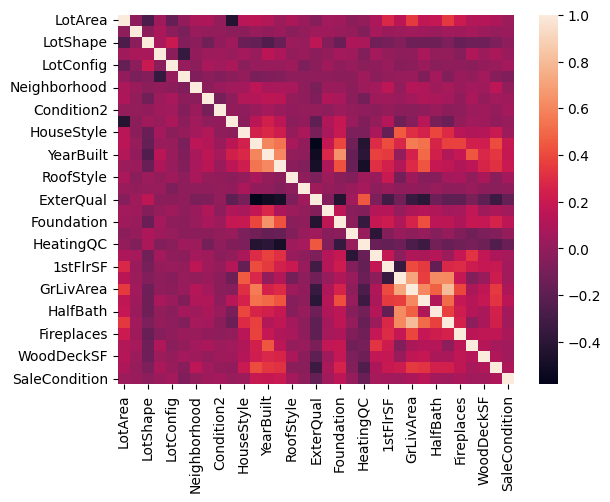

In [382]:
sns.heatmap(X.corr())

Здесь зависимость между фичами сильная (мултикореляционность)
Можем применить регуляризацию.

**Регуляризация Ridge**

In [383]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
alpha = np.logspace(-2, 3, 20)
modelR = Ridge()
searcher = GridSearchCV(modelR, [{'alpha': alpha}], scoring='neg_root_mean_squared_error', cv=5)
searcher.fit(X_train, y_train)

print('Лучшие параметры для Ridge: ', searcher.best_params_['alpha'])

Лучшие параметры для Ridge:  0.6951927961775606


In [384]:
best_model = Ridge(searcher.best_params_['alpha'])
best_model.fit(X_train, y_train)
best_y = best_model.predict(X_test)

In [385]:
mse = mean_squared_error(y_test, best_y)
mae = mean_absolute_error(y_test, best_y)
rmse = mean_squared_error(y_test, best_y, squared=False)
r2 = r2_score(y_test, best_y)
print(f' MSE: {mse}\n MAE: {mae}\n RMSE: {rmse}\n R2: {r2}')

 MSE: 609574284.688467
 MAE: 17888.778144484004
 RMSE: 24689.558211690768
 R2: 0.8325995023186521


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [386]:
modelL = Lasso()
searcher = GridSearchCV(modelL, [{'alpha': alpha}], cv=5, scoring='neg_root_mean_squared_error')
searcher.fit(X_train, y_train)
best_alphaL = searcher.best_params_['alpha']
print(f'Лучший параметр для Lasso: {best_alphaL}')

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+11, tolerance: 2.423e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+11, tolerance: 2.363e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

Лучший параметр для Lasso: 88.58667904100822


In [387]:
print(searcher.best_estimator_)

Lasso(alpha=88.58667904100822)


In [388]:
modelL = Lasso(best_alphaL)
modelL.fit(X_train, y_train)

best_yL = modelL.predict(X_test)

In [389]:
mse = mean_squared_error(y_test, best_yL)
mae = mean_absolute_error(y_test, best_yL)
rmse = mean_squared_error(y_test, best_yL, squared=False)
r2 = r2_score(y_test, best_yL)
print("Метрики lasso")
print(f' MSE: {mse}\n MAE: {mae}\n RMSE: {rmse}\n R2: {r2}')

Метрики lasso
 MSE: 597915007.5821038
 MAE: 17656.461891488085
 RMSE: 24452.300660308098
 R2: 0.8358013578418184


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Кросс валидация для Ridge**

In [390]:
cv_scoresR = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Оценки кросс валидации Ridge:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresR))
print("Средняя кросс валидации Ridge R2 = %.4f" % np.mean(cv_scoresR))

Оценки кросс валидации Ridge:
	 0.8611
	0.8526
	0.8245
	0.8255
	0.8087
Средняя кросс валидации Ridge R2 = 0.8345


**Кросс валидация для Lasso** 

In [391]:
cv_scoresL = cross_val_score(modelL, X, y, cv=5, scoring='r2')
print("Оценки кросс валидации Lasso:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresL))
print("Средння кросс валидации Lasso R2 = %.4f" % np.mean(cv_scoresL))

Оценки кросс валидации Lasso:
	 0.8608
	0.8563
	0.8244
	0.8267
	0.8070
Средння кросс валидации Lasso R2 = 0.8351


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+11, tolerance: 3.376e+08
  model = cd_fast.enet_coordinate_descent(


In [392]:
cv_scores_forest = cross_val_score(ranmodel, X, y, cv=5, scoring='r2')
print("Оценки кросс валидации Ranmodel:\n\t", "\n\t".join("%.4f" % x for x in cv_scores_forest))
print("Средння кросс валидации Lasso R2 = %.4f" % np.mean(cv_scores_forest))

Оценки кросс валидации Ranmodel:
	 0.8516
	0.8627
	0.8356
	0.8839
	0.8121
Средння кросс валидации Lasso R2 = 0.8492


In [393]:
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Оценки кросс валидации Ranmodel:\n\t", "\n\t".join("%.4f" % x for x in cv_scores_xgb))
print("Средння кросс валидации Lasso R2 = %.4f" % np.mean(cv_scores_xgb))

Оценки кросс валидации Ranmodel:
	 0.8412
	0.8752
	0.8274
	0.8761
	0.8269
Средння кросс валидации Lasso R2 = 0.8493


Предсказание по тестовому файлу у которой не известны Y. 

In [394]:
target_y = ranmodel.predict(test_df)
target_y

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([72841.24, 72841.24, 73191.13, ..., 73151.24, 72841.24, 73191.13])

In [395]:
target_y = xgb_model.predict(test_df)
target_y

array([53965.57 , 50812.867, 56382.79 , ..., 58956.117, 53965.57 ,
       58956.117], dtype=float32)

In [396]:
output = pd.DataFrame({'Id': id_test,
                       'SalePrice': target_y})
output

,Id,SalePrice
0,1461,53965.570312
1,1462,50812.867188
2,1463,56382.789062
3,1464,56382.789062
4,1465,51789.890625
...,...,...
1454,2915,58956.117188
1455,2916,53965.570312
1456,2917,58956.117188
1457,2918,53965.570312


In [397]:
output.to_csv('Predictionpriceregmodels.csv', index=False)